#Exploring the outer heliosphere solar wind using data from the New Horizons 'Solar Wind Around Pluto' (SWAP) instrument.

As the New Horizons spacecraft moves into the outer heliosphere, it has been able to confirm some of the original findings of the Voyager spacecraft as described in:

- Citation: Heather A. Elliott et al,'Slowing of the Solar Wind in the Outer Heliosphere', 2019 ApJ 885 156
[DOI 10.3847/1538-4357/ab3e49](https://iopscience.iop.org/article/10.3847/1538-4357/ab3e49#apjab3e49s2)

Note also that NH does not have a magnetometer on board so we will have to explore the magnetic field in a later activity. The goal is to compare the data to the Parker model of a hot plasma flowing out from the Sun.

Using a Magnetohydrodynaics (MHD) approach, we expect the following:
- The solar wind velocity does not have a strong variation with distance and is moving in the radial direction. (You will check the direction in a different activity)
- The plasma density drops off at $1/r^2$ as the solar wind expands into the heliosphere.
- Moving out from the Sun, the model assumes adiabatic expansion (no heat added) so the temperture should drop off at $T ∝ 1/r^{4/3}$.

We will see if these assumptions are supported by the data and discuss what might be going on.  

## The preliminaries
The next two cells installs and loads the appropriate packages on this instance of the notebook.

The [PySPEDAS package](https://pyspedas.readthedocs.io/en/latest/) allows allows for access to spacecraft and some groundbased data from the CDAweb.



In [ ]:
pip install -q pyspedas==1.5.12 #takes about 30 seconds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.2/229.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.2/97.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00


In [ ]:
import pyspedas
from pytplot import tplot, options, get_data
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

## 0) Accessing and Loading the data from CDAweb
The "Coordinated Data Anaalysis Web" ([CDAWeb](https://cdaweb.gsfc.nasa.gov/)) provides access to data from a wide variety of spacecraft and ground based instruments. Data can be downloaded directly from the web page, but there are also PySPEDAS routines that access the data. We will use those in this notebook.

The next two cells set up a cdaweb object that allows for data access.  

In [ ]:
# Create the CDAWeb interface object
cdaweb_obj = pyspedas.CDAWeb()

# set mission and instrument type
mission_list = ['New Horizons']
#instrument_list = ['Plasma and Solar Wind']
instrument_list = ['Particles (space)']
# This mission and instrument are selected from the lists returned by
# the cdaweb_obj.get_observatories() and cdaweb.get_instruments() methods.

dataset_list = cdaweb_obj.get_datasets(mission_list, instrument_list)
print(dataset_list)

['NEW_HORIZONS_SWAP_PICKUP-IONS (2008-11-16 to 2017-03-31)', 'NEW_HORIZONS_SWAP_PICKUP-IONS-HISTOGRAM (2008-10-31 to 2017-03-31)', 'NEW_HORIZONS_SWAP_VALIDSUM (2008-10-10 to 2023-07-31)']


In [ ]:
dataset = 'NEW_HORIZONS_SWAP_VALIDSUM (2008-10-10 to 2023-07-31)'
start_time = '2009-10-10 00:00:00'# Time range does not matter for NH data set
end_time = '2009-11-10 00:00:00' # Time range does not matter for NH data set

# Get the URLs for the available data in this time range
urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)

# Download the data and load as tplot variables.  Setting a prefix
# is useful if you want to work with both Voyager 1 and Voyager 2
# data; the variable names in the archived data are the same for both
# spacecraft.

cdaweb_obj.cda_download(urllist,"cdaweb/")

11-Jun-24 18:25:05: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/new-horizons/swap/validsum/2008/new_horizons_swap_validsum_20081010210700_v1.0.7.cdf to /content/cdaweb///new-horizons/swap/validsum/2008/new_horizons_swap_validsum_20081010210700_v1.0.7.cdf
11-Jun-24 18:25:05: Download complete: /content/cdaweb///new-horizons/swap/validsum/2008/new_horizons_swap_validsum_20081010210700_v1.0.7.cdf
11-Jun-24 18:25:07: Downloaded 1 files.
11-Jun-24 18:25:07: tplot variables:
11-Jun-24 18:25:07: NH_HAE_J2000_D_LON
11-Jun-24 18:25:07: v
11-Jun-24 18:25:07: NH_HAE_J2000_D_Z
11-Jun-24 18:25:07: pth
11-Jun-24 18:25:07: NH_HAE_J2000_D_LAT
11-Jun-24 18:25:07: NH_HAE_J2000_D_X
11-Jun-24 18:25:08: NH_HGI_D_Y
11-Jun-24 18:25:08: n
11-Jun-24 18:25:08: NH_HG_D_Y
11-Jun-24 18:25:08: NH_HAE_J2000_D_Y
11-Jun-24 18:25:08: pdyn
11-Jun-24 18:25:08: NH_HG_D_LAT
11-Jun-24 18:25:08: NH_HGI_D_X
11-Jun-24 18:25:08: NH_HGI_D_R
11-Jun-24 18:25:08: t
11-Jun-24 18:25:08: NH_HG_D_X
11-Jun-24 18:25:08: NH_HGI_

[['https://cdaweb.gsfc.nasa.gov/sp_phys/data/new-horizons/swap/validsum/2008/new_horizons_swap_validsum_20081010210700_v1.0.7.cdf',
  '/content/cdaweb///new-horizons/swap/validsum/2008/new_horizons_swap_validsum_20081010210700_v1.0.7.cdf',
  1]]

There are a number of variables listed above. The variable names and meta-data can be found here: [Variable definitions](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/new_horizons_swap_validsum_00000000_v01.skt)

For now we are interested in
- n: particle density (#/cc)
- v: bulk plasma speed (km/s)  
- t: plasma temperature (degrees Kelvin)
- NH_HGI_D_R: Distance from the Sun (in AU)



## 1)Quick plot of the variables
PySPEDAS has a built in plotting routine for time series plots.  
Run the code cell below to

11-Jun-24 18:25:08: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

11-Jun-24 18:25:11: <frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()

11-Jun-24 18:25:11: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

11-Jun-24 18:25:11: <frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()

11-Jun-24 18:25:11: <frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()

11-Jun-24 18:25:11: <frozen importlib._bootstra

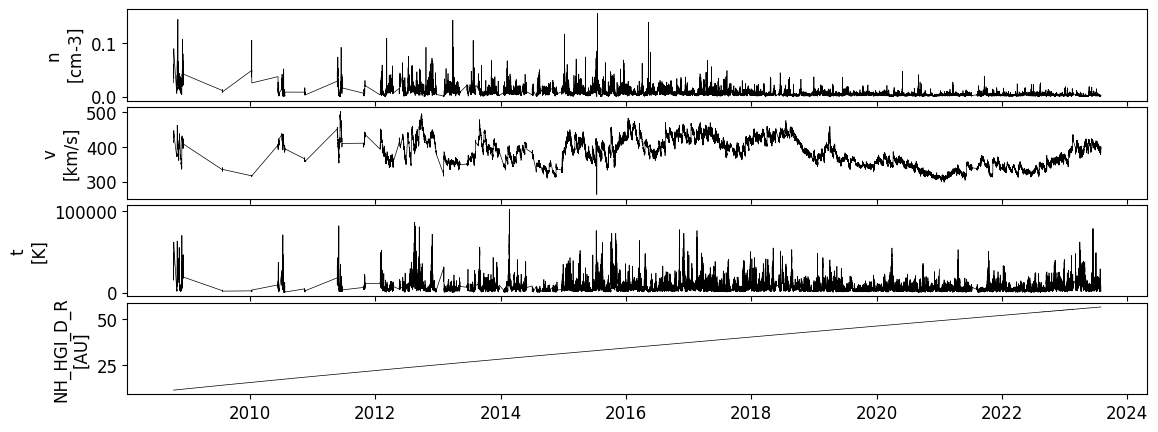

In [ ]:
options('n', 'ylog', 0)
options('t', 'ylog', 0)
tplot(['n','v','t','NH_HGI_D_R'])


####Discussion
- What trends can you see in this data? (To see more detail, try setting the log options to 1.)
- Is there any point in plotting the velocity on a log scale?
- What can you say about the speed of the New Horizons spacecraft?



## Getting Data
To explore this in more detail, we can get the data directly into lists we can minipulate.  
The next cell downloads data objects which contain two lists, for each object: the obj.y list with the data values, and the obj.times list with the time for each data point. This time is given in

In [ ]:
den = get_data('n') #plasma density
vel = get_data('v') #plasma bulk speed
temp = get_data('t') #plasma temperature
rad = get_data('NH_HGI_D_R') #spacecraft distance from the Sun

### Calculating New Horizons Speed and Predicting the approach to the termination shock.  
**Skip this if time is an issue**

As an example of how to work with the data objects, do a quick calculation of the

The first cell below returns the length of the two lists in each object into the variable "Num".

- rad.times[0] and rad.times[Num] are the initial and final times in the data set in seconds. (This time is measured from Jan. 1st 1970)
- rad.y[0] and rad.y[Num] are the initial and final distance from the Sun in AU.  

Add code that will calculate the speed of the spacecraft in AU's per year and km/s.

In [ ]:
Num = len(rad.times) - 1 # Num is the highest index of the times list

# Write code here to calcuate the New Horizons spacecraft speed
# Get resulst in AU's per second, AU's per year, and  and km/s
# be sure to print your answer.

dr = rad.y[Num] - rad.y[0]
dt = rad.times[Num] - rad.times[0]
v_au_sec = dr/dt # speed in AU/sec
v_km_sec = dr/dt * 1.495978707e8
v_au_year = dr/dt*365*24*3600
print(v_au_sec, v_km_sec, v_au_year)

9.709224003706687e-08 14.524792371038492 3.061900881808941


Use the next cell to create a list of distances that corresponds to the approproate time and other data that will be used to plot later in the notebook. Be sure to fix the 'nh_vel' value based on the speed you calcuated above.  

In [ ]:
nh_vel = 3.062 # au per year FIX THIS VALUE
nh_vel_sec = nh_vel/(365*24*3600) # au per sec OR THIS VALUE
dist = rad.y[0]+nh_vel_sec*np.array(rad.times-rad.times[0])
print(dist)

[11.26773548 11.26782869 11.2681829  ... 56.62758917 56.62793833
 56.62793794]


### Scale Time to Distance (Skip if time is tight)
Use the results above to create a new array that  is distance instead of time and can be used to plot the data.  

### Discussion
- How does the spacecraft speed compare to the solar wind speed?
- Based on the estimate of the location of the Termination Shock seen by voyager, can you estimate when New Horizon's might be expected to cross the termination shock.
- Considering these results, and the plot of distance vs. time above, how would a plot of the data with time compare to a plot of the data with distance?




---

## 2) Exploring the Solar Wind
The cell below plots the parameters we extracted in the last section.  

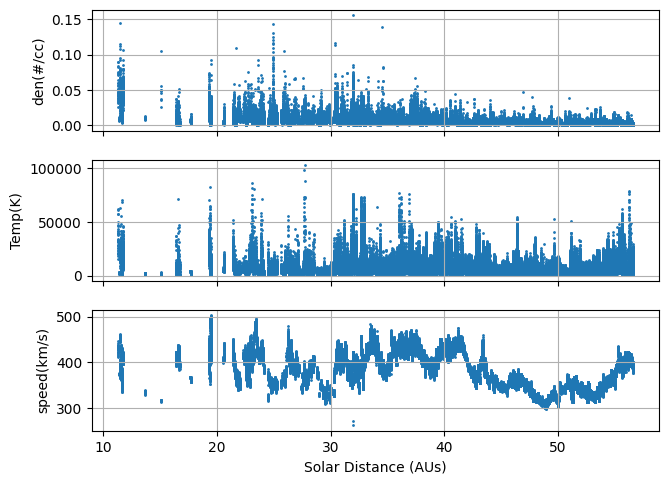

In [ ]:
#create a stack plot of the solar wind variables
fig, axs = plt.subplots(3, 1,sharex = True)
fig.tight_layout()

axs[0].scatter(dist, den.y,1)
axs[0].set_ylabel('den(#/cc)')
#axs[0].set_yscale('log')
axs[0].grid(True)

axs[1].scatter(dist, temp.y,1)
axs[1].set_ylabel('Temp(K)')
#axs[1].set_yscale('log')
axs[1].grid(True)

axs[2].scatter(dist, vel.y,1)
axs[2].set_ylabel('speed(km/s)')
axs[2].set_xlabel('Solar Distance (AUs)')
axs[2].grid(True)

plt.show()

### Discussion
- Uncomment the lines that allow log scale to better see trends.  
- What is the issue with using a log scale on the x-axis?

### Scaling of Density
- Before continuing, how do you expect density to vary with distance (or time) from the Sun?

The cells below plot the density data along with a smoothed version from th running average of a window. The smoothing is done by creating a rolling average with a window size set by the variable 'win'.  

In [ ]:
# Creating a Smoothed Data Set for Density
win = 1000
den_smooth = np.convolve(den.y, np.ones(win)/win, mode="same")

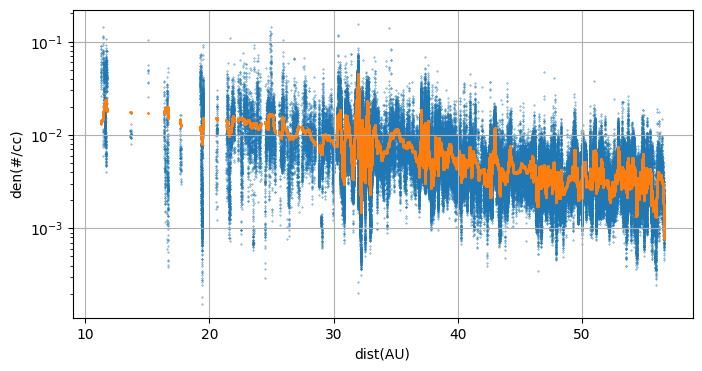

In [ ]:
fig, axs = plt.subplots(figsize=(8,4))
axs.scatter(dist, den.y,0.1) # plot the data
axs.scatter(dist, den_smooth,0.1) # smoothed

axs.set_ylabel('den(#/cc)')
axs.set_xlabel('dist(AU)')
axs.set_yscale('log')
#axs.set_xscale('log')

axs.grid(True)

### Discussion
- Adjust the window size to create smoothed data set tat you are happy with.  
- Is this the best way of smoothing this data? What other options would you consider?


In the cell below, a simple power law model is created and then plotted along with the density data. Change the power law model to one that is more appropriate and then plot it.

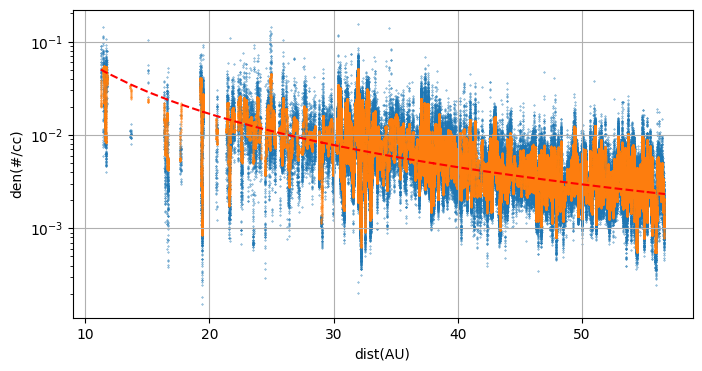

In [ ]:
fig, axs = plt.subplots(figsize=(8,4))
axs.scatter(dist, den.y,0.1) # plot the data
axs.scatter(dist, den_smooth,0.1) # smoothed

axs.set_ylabel('den(#/cc)')
axs.set_xlabel('dist(AU)')
axs.set_yscale('log')
#axs.set_xscale('log')

den_mod1 = 5.0*np.power((dist),-1.9)
axs.plot(dist,den_mod1,'r--') # plot the model
axs.grid(True)

- When guessing for the parameters of the model, what is a good guess for the coefficient? (Consider what the value of the solar wind density should be at 1 AU).


- How well does your trial power law compare to the data?

- Try adjusting to power to see if you can get a better fit. Which power do you think fits the data the best?


---



### Variations in Velocity


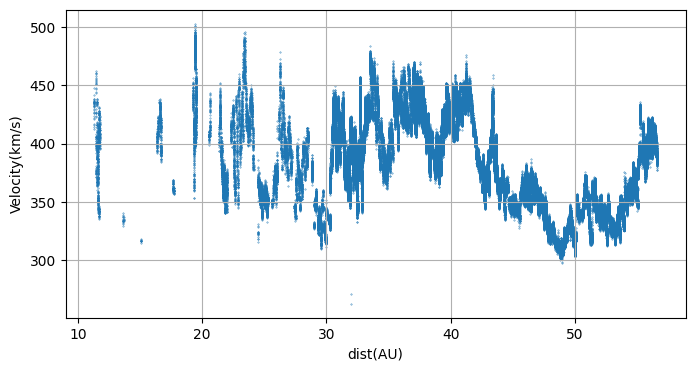

In [ ]:
fig, axs = plt.subplots(figsize=(8,4))
axs.scatter(dist, vel.y,0.1) # plot the data

axs.set_ylabel('Velocity(km/s)')
axs.set_xlabel('dist(AU)')

axs.grid(True)

### Discussion of Variations in Velocity
- How does the range of the solar wind velocity in the outer heliosphere data?
- What variations do you see in the solar wind velocity?
- What are some possible explainations for the variations seen in the velocity?


---



### Variation in Temperature
The temperature

- If the temperature obeys a power law, what should the coefficent be?
- Refer to the [SWPC Real Time Solar Wind web page](https://www.swpc.noaa.gov/products/real-time-solar-wind).

The next two cells generate a smoothed data set and plot the temperatue data along with a couple of model examples.  


In [ ]:
# Creating a Smoothed Data Set for Temperature
win = 500 #choose the same window length you choose above.
temp_smooth = np.convolve(temp.y, np.ones(win)/win, mode="same")

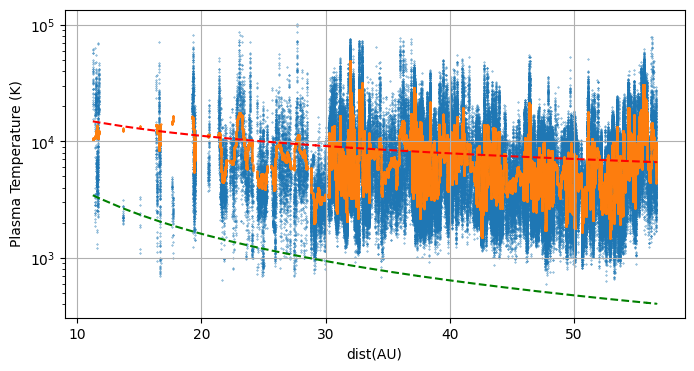

In [ ]:
fig, axs = plt.subplots(figsize=(8,4))
axs.scatter(dist, temp.y,0.1) # plot the data
axs.scatter(dist, temp_smooth,0.1) # smoothed

axs.set_ylabel('Plasma Temperature (K)')
axs.set_xlabel('dist(AU)')
axs.set_yscale('log')
#axs.set_xscale('log')

temp_mod1 = 0.5e5*np.power((dist),-0.5) #adjustable powerlaw model
adi_mod = (8.64e4)*np.power((dist),-1.33) # Assume Adiabatic Expansion
axs.plot(dist,temp_mod1,'r--') # plot the model guess in red
axs.plot(dist,adi_mod,'g--') # adiabatic model in green

axs.grid(True)

###Discusson of Temperature Variation
- How does the measured temperature compare to the adiabatic model?
- Adjust the power law model to find a 'best fit' (by eye) for the data.

## Thermal Particle Spectrum and Pickup Ions

New Horizons was specifically designed to measure both solar wind thermal plasma as well a a population of higher temperature particles that make up the "Pick-Up Ions (PUIs). This is presented as a historgram.  

[Variable Link](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/new_horizons_swap_pickup-ions-histogram_00000000_v01.skt)

### Get Data
The following gets histogram data from the New Horizons SWAP instrument.

In [ ]:
dataset = 'NEW_HORIZONS_SWAP_PICKUP-IONS-HISTOGRAM (2008-10-31 to 2017-03-31)'
start_time = '2009-10-10 00:00:00' #for New Horizons these times don't matter
end_time = '2009-11-10 00:00:00'
cdaweb_obj = pyspedas.CDAWeb()

# Get the URLs for the available data in this time range
urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)

cdaweb_obj.cda_download(urllist,"cdaweb/")

11-Jun-24 18:25:19: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/new-horizons/swap/ions-histogram/new_horizons_swap_pickup-ions-histogram_20081031180800_v1.0.1.cdf to /content/cdaweb///new-horizons/swap/ions-histogram/new_horizons_swap_pickup-ions-histogram_20081031180800_v1.0.1.cdf
11-Jun-24 18:25:19: Download complete: /content/cdaweb///new-horizons/swap/ions-histogram/new_horizons_swap_pickup-ions-histogram_20081031180800_v1.0.1.cdf
11-Jun-24 18:25:19: Downloaded 1 files.
11-Jun-24 18:25:19: tplot variables:
11-Jun-24 18:25:19: nh_swap_histogram_uncertainties
11-Jun-24 18:25:19: nh_swap_distance_to_sun
11-Jun-24 18:25:19: nh_swap_histogram


[['https://cdaweb.gsfc.nasa.gov/sp_phys/data/new-horizons/swap/ions-histogram/new_horizons_swap_pickup-ions-histogram_20081031180800_v1.0.1.cdf',
  '/content/cdaweb///new-horizons/swap/ions-histogram/new_horizons_swap_pickup-ions-histogram_20081031180800_v1.0.1.cdf',
  1]]

### Quick Plot

This cell uses the PySPEDAS plotting tool to plot the SWAP particle spectrum as a function of time?

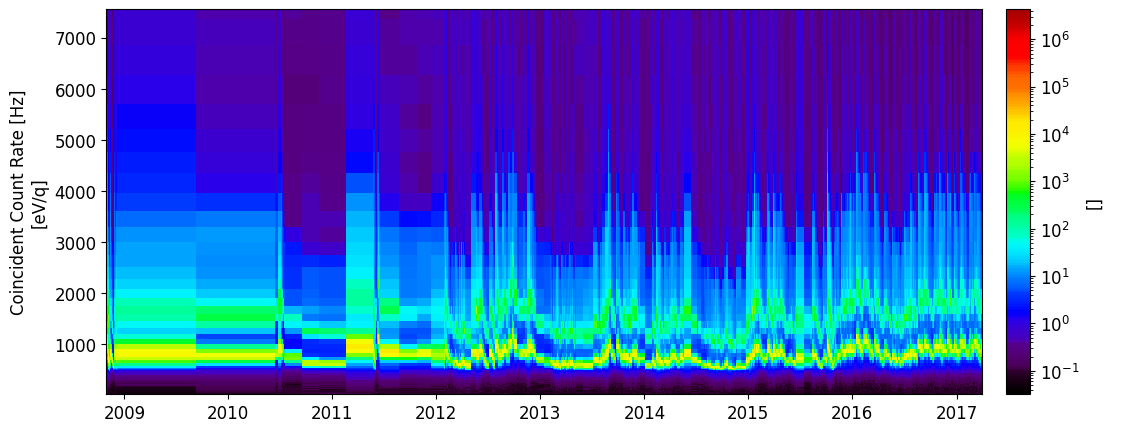

In [ ]:
tplot('nh_swap_histogram')

### Discussion of Spectragrph
The graph above shows the energy spectrum as it evolves over time.
- What notable features do you see in the spectrum?
- Do you see any trends in the spectrum?


---



### Spectrum analysis
We can look at the individual spectrum from each time slice above.  

In [ ]:
spec = get_data('nh_swap_histogram')
hist = spec.y
# energy bins from the metadata linked above
ene =  [24.23, 26.09, 27.90, 31.65, 35.28, 37.17, 40.82, 46.37, 50.12, 55.60, 61.09,
         66.71, 72.20, 79.53, 87.03, 96.21, 105.39, 114.57, 125.83, 138.71, 151.58,
         166.29, 182.85, 201.24, 219.63, 242.19, 264.30, 290.10, 317.75, 349.08, 382.25,
         419.11, 457.81, 502.04, 549.96, 603.40, 660.53, 725.04, 795.07, 870.63, 953.56,
         1045.71, 1145.23, 1255.80, 1375.59, 1508.29, 1653.88, 1812.37, 1985.61, 2175.43,
         2385.52, 2614.05, 2870.43, 3145.58, 3446.58, 3777.12, 4139.06,4536.09, 4971.90,
         5448.33, 5970.92, 6543.38, 7171.23, 7549.79
 ]


### Plotting a historgram

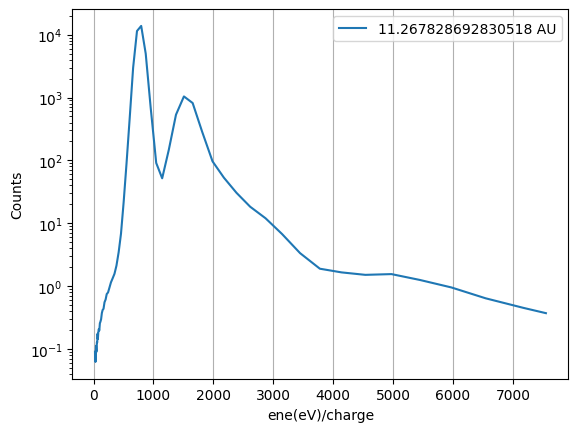

In [ ]:
time_index =1 #adjust this to change the time/distance

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xlabel('ene(eV)/charge')
ax.set_ylabel('Counts')
ax.xaxis.grid()

lab = str(dist[time_index])+' AU'
ax.plot(ene, hist[time_index], label=(lab))

ax.legend()


### Discussion

- How many particle populations do you see in the historgram?
- Can you estimate the average bulk speed of each population? (You can use the cell below to do the calculation.)
- How would you estimate the temperature of each population? (No need to do the calculation for this question.)
- Choose different time indicies.  How do the features of the spectrum change as the spacecraft moves further out in the solar system?

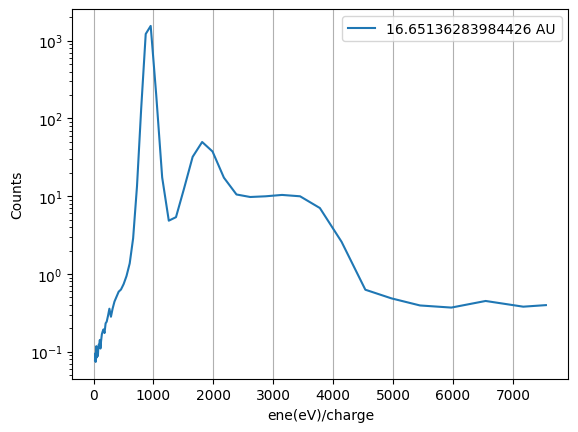

In [ ]:
time_index =1000 #adjust this to change the time/distance

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xlabel('ene(eV)/charge')
ax.set_ylabel('Counts')
ax.xaxis.grid()

lab = str(dist[time_index])+' AU'
ax.plot(ene, hist[time_index], label=(lab))

ax.legend()